In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
colorlist = list(matplotlib.colors.TABLEAU_COLORS)
import simplesimdb as simplesim
from netCDF4 import Dataset
import feltorutilities as fp

from methods.SolutionClass2 import SolutionClass
from methods.make_input import make_plasma_input
from methods.save_load_data2 import save_data, load_data
from methods.wavefront import get_wavefront_datapoint

The system was simulated in the previous notebook. The data is loaded from this

In [3]:
sols = []
for i in range(8):
    savefile = "DATA/Ion-vel_data/set {}".format(i+1)
    sols.append(load_data(filename=savefile))

We find the maximum ion velocity at every time

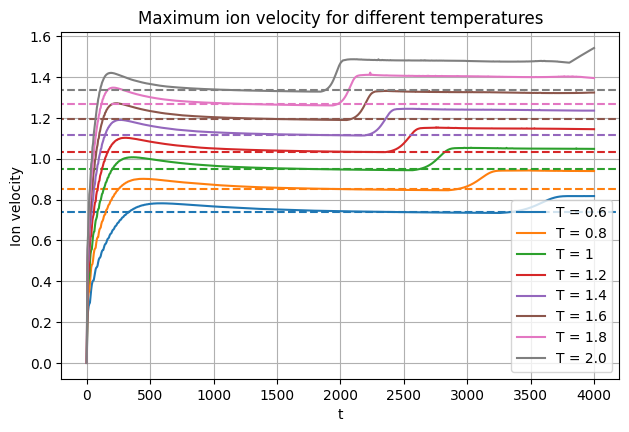

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8*0.9,5*0.9))

t = sols[0].data_full["t"]
vels = [0.74, 0.85, 0.95, 1.035, 1.119, 1.195, 1.268, 1.335]
for i, sol in enumerate(sols):
    c = colorlist[i]
    max_ui = np.max(sol.data_full["ui"], axis=1)
    ax.plot(t, max_ui, color=c, label="T = {}".format(sol.params["init"]["t_l"]))
    xlim = ax.get_xlim()
    ax.hlines(vels[i], xmin=min(t)-500, xmax=max(t)+500, color=c, linestyles='dashed')
    ax.set_xlim(xlim)  # Hack to keep the xlim

ax.set_title("Maximum ion velocity for different temperatures")
ax.set_xlabel("t")
ax.set_ylabel("Ion velocity")
ax.grid()
ax.legend()
plt.savefig("max val ui")

In [7]:
for vel, sol in zip(vels, sols):
    tl = sol.params["init"]["t_l"]
    tr = sol.params["init"]["t_r"]
    nl = sol.params["init"]["n_l"]
    nr = sol.params["init"]["n_r"]
    T = (nl*tl + nr*tr)/(nl+nr)
    print("Simulated velocity: {0}   \t Theoretical velocity {1}"
          .format(2*vel, 2*np.sqrt(T)))

Simulated velocity: 1.48   	 Theoretical velocity 1.4422205101855958
Simulated velocity: 1.7   	 Theoretical velocity 1.6653327995729064
Simulated velocity: 1.9   	 Theoretical velocity 1.8618986725025255
Simulated velocity: 2.07   	 Theoretical velocity 2.039607805437114
Simulated velocity: 2.238   	 Theoretical velocity 2.203028218914441
Simulated velocity: 2.39   	 Theoretical velocity 2.3551362310207593
Simulated velocity: 2.536   	 Theoretical velocity 2.4979991993593593
Simulated velocity: 2.67   	 Theoretical velocity 2.6331223544175333


This definitively does not work. 

Interestingly enough this is pretty much half of what is expected